## Sumário

1. Fototriangulação para várias imagens - método dos modelos independetes

2. Técnica para remoção de observações com erros grosseiros (outliers) do ajustamento

## 1. Fototriangulação para várias imagens - método dos modelos independetes


Também chamdo de <i>Multiple View stereo</i>, objetiva-se obter as coordenada 3D de pontos através de imagens calibradas de diferentes pontos de vista da mesma cena.

Visualize uma armação com várias câmeras calibradas, ou seja, matriz de parâmetros íntrisecos $K$ conhecida, além das posições relativas das câmeras, uma em relação à outra, conforme fig. abaixo:

Esse método é chamado modelo independente porque não impõe relações de orientação entre as câmeras a priori. Cada câmera é tratada de forma independente, e os pontos 3D são calculados diretamente pela interseção dos raios vindos das projeções.

<img src="data/MultipleViewStereo.png" width=600>

Para solucionar este tipo de problema, devemos em primeiro lugar, obter as matrizes de projeção de pontos do espaço-objeto para o espaço-imagem, ou seja, as matrizes $P_n$ para $n=1,...,N$, tal que:

$$Z_c
\begin{bmatrix}
u \\
v \\
1
\end{bmatrix}=
\underbrace{
        \underbrace{
            \begin{bmatrix}
                f_x & 0 & c_x & 0 \\
                0 & f_y & c_y & 0 \\
                0 & 0 & 1 & 0
            \end{bmatrix}
        }_{Intrinsic \ parameters \ [K_{3\times 3}|0]}
        \underbrace{
            \begin{bmatrix}
                R_{3 \times 3} & t_{3\times 1} \\
                0_{1 \times 3} & 1 
            \end{bmatrix}
        }_{Extrinsic \ parameters \ T_{4\times 4}}
}_{P_{3\times 4}}
\begin{bmatrix}
X \\
Y \\
Z\\
1
\end{bmatrix}
$$

### (i) Relembrando a matriz de parâmetros extrínsecos T:

Com a notação de mudança de base fica fácil observar como interligar as tranformações extrísecas da camera em cada posição, a equação nos indica que a tranformação $T$ leva pontos do sistema de referência do espaço objeto $\mathbf{X_w}$ para o sistema de referênica interno de câmera câmera $\mathbf{X_{O_n}}$

$$
\begin{bmatrix}
X_{O_n} \\
Y_{O_n} \\
Z_{O_n} \\
1
\end{bmatrix} = 
_{O_n}{\left[T\right]}_{w}
\begin{bmatrix}
X_w \\
Y_w \\
Z_w \\
1
\end{bmatrix} 
$$


- $T_1$ pode ser reescrito com a notação de mudança de base da seguinte forma: 
    - $_{O_1}{T}_{w}$ é a posição da câmera na visada 1, antes de qualquer movimentação, também chamada de câmera 1.
    - Se $T_1= I_{4 \times 4}$, acabamos não atribuindo a escala ao nosso problema, mas mesmo assim seremos capazes de reconstruir ponto a ponto 3D e obtermos uma forma geral para a cena dentro de um <u>sistema de coordenadas local</u>.
- ${}_{O_2}{T}_{w}$ é a posição da câmera na visada 2, depois de um deslocamento, também chamado de câmera 2.
    - $ {}_{O_2}T_{O_1}= {}_{O_1}T_{O_2}^{-1}$
    - $T_2 = {}_{O_2}{T}_{w} = {}_{O_2}T_{O_1} \  {}_{O_1}{T}_{w}$
- $_{O_3}{T}_{w}$ é a posição da câmera na visada 3, depois de um deslocamento, também chamado de câmera 3.
    - $ {}_{O_3}T_{O_2}= {}_{O_2}T_{O_3}^{-1}$
    - $T_3 = {}_{O_3}{T}_{w} = {}_{O_3}T_{O_2} \ {}_{O_2}T_{O_1} \  {}_{O_1}{T}_{w}$
- E assim por diante, a fórmula geral fica:
    - $T_N = {}_{O_N}{T}_{w} = {}_{O_{N-1}}T_{O_N}^{-1} ...  \ {}_{O_1}T_{O_2}^{-1} \  {}_{O_1}{T}_{w} = \prod_{i=1}^N \left ( {}_{O_{i}}T_{O_{i+1}}^{-1} \right ) \cdot {}_{O_1}{T}_{w}$ 
- Onde: $T^{-1} = \begin{bmatrix} R^T & -R\mathbf{t} \\ 0 & 1\end{bmatrix}$



#### Decomposição de $T$ em $R$, $t$, $C$:

Sabe-se que $T = [ R | t ]$ é a transformação do espaço-objeto para o sistema câmera.

Assim: 

- Rotação do espaço-objeto em relação ao sistema da câmera: $R = T[:, :3]$;
- Posição da origem do espaço-objeto no sistema da câmera: $\mathbf{t}= T[:, 3]$
- Posição do centro perspectivo da câmera no espaço-objeto: $\mathbf{C} = -R^T \mathbf{t}$

### (ii) Relembrando a solução geral da fototriangulação de um par esterereoscópico:

Tendo duas câmeras e conhecidos suas matrizes de transformação do sistema de referência do espaço-objeto para o sistema de referência do espaço-imagem em pixels $P_1$ e $P_2$, bem como, as coordenadas coluna e linha dos pixels correspondentes (fotogramétricos) nas duas imagens $\overrightarrow{p_1} \ (u_1 \ v_1)$ e $\overrightarrow{p_2} \ (u_2 \ v_2)$, temos:

$
\underbrace{\begin{bmatrix} u_{1}P_1^3 - P_1^1 \\ v_{1}P_1^3 - P_1^2 \\ u_{2}P_2^3 - P_2^1 \\ v_{2}P_2^3 - P_2^2  \end{bmatrix}}_A \underbrace{\begin{bmatrix}  X \tilde{w} \\ Y\tilde{w} \\ Z\tilde{w} \\ \tilde{w} \end{bmatrix}}_{\overrightarrow{X}}= 0
$

Onde $P_n^l$ indica a linha $l$ da matriz $P_n$.

$
 A\overrightarrow{X}=0 \xrightarrow{ajustamento}
$

$A\overrightarrow{X_a}=V$ sujeito a $||\overrightarrow{X_a}||=1 \rightarrow $

$\overrightarrow{X_a}$ estimado é o autovetor correspondente ao menor autovalor de $A^TA$.

Tendo $N$ câmeras podemos construir a equação para o ajsutamento da mesma maneira, assim temos:

$
\begin{bmatrix} 
    u_{1}P_1^3 - P_1^1 \\ v_{1}P_1^3 - P_1^2 \\ 
    u_{2}P_2^3 - P_2^1 \\ v_{2}P_2^3 - P_2^2 \\
    \vdots \\
    u_{N}P_N^3 - P_N^1 \\ v_{N}P_N^3 - P_N^2  
\end{bmatrix}
\begin{bmatrix}  X \tilde{w} \\ Y\tilde{w} \\ Z\tilde{w} \\ \tilde{w} \end{bmatrix} = 0   
$

Um problema prático que pode vir à mente é: Como inserir nesta equação se o ponto 3D é visível ou não na imagem $n$? 

- Em um primeiro momento pode-se simplesmente remover o par de equações da respectiva imagem onde o ponto 3D não é visível. 
- Mas em uma reconstrução de vários pontos 3D, essa abordagem implicaria em ter que reconstruir a matriz $A$ diversas vezes. 
- Uma solução mais robusta seria constuir um conjunto "relê" $\mathcal{X_{nk}} = 1 $, para os casos onde o ponto 3D $k$ é visto na imagem $n$ e caso contrário, igual a $0$.

Assim, a equação fica:

$
\begin{bmatrix} 
    \mathcal{X}_{11}(u_{1}P_1^3 - P_1^1) \\ \mathcal{X}_{11}(v_{1}P_1^3 - P_1^2) \\ 
    \mathcal{X}_{21}(u_{2}P_2^3 - P_2^1) \\ \mathcal{X}_{21}(v_{2}P_2^3 - P_2^2) \\
    \vdots \\
    \mathcal{X}_{N1}(u_{N}P_N^3 - P_N^1) \\ \mathcal{X}_{N1}(v_{N}P_N^3 - P_N^2)  
\end{bmatrix}
\begin{bmatrix}  X \tilde{w} \\ Y\tilde{w} \\ Z\tilde{w} \\ \tilde{w} \end{bmatrix} = 0  \rightarrow 
\underbrace{
    \left [
\begin{matrix} 
    \mathcal{X}_{11} \\
    \mathcal{X}_{11} \\
    \mathcal{X}_{21} \\
    \mathcal{X}_{21} \\
    \vdots  \\
    \mathcal{X}_{N1} \\
    \mathcal{X}_{N1}
\end{matrix} \ \ 
\begin{matrix} 
    \mathcal{X}_{11} \\
    \mathcal{X}_{11} \\
    \mathcal{X}_{21} \\
    \mathcal{X}_{21} \\
    \vdots  \\
    \mathcal{X}_{N1}\\
    \mathcal{X}_{N1}
\end{matrix} \ \ 
\begin{matrix} 
    \mathcal{X}_{11} \\
    \mathcal{X}_{11} \\
    \mathcal{X}_{21} \\
    \mathcal{X}_{21} \\
    \vdots  \\
    \mathcal{X}_{N1} \\
    \mathcal{X}_{N1}
\end{matrix} \ \ 
\begin{matrix} 
    \mathcal{X}_{11} \\
    \mathcal{X}_{11} \\
    \mathcal{X}_{21} \\
    \mathcal{X}_{21} \\
    \vdots  \\
    \mathcal{X}_{N1} \\
    \mathcal{X}_{N1}
\end{matrix}
\right ] }_{2N \times 4} \odot
\underbrace{\begin{bmatrix} 
    u_{1}P_1^3 - P_1^1 \\ v_{1}P_1^3 - P_1^2 \\ 
    u_{2}P_2^3 - P_2^1 \\ v_{2}P_2^3 - P_2^2 \\
    \vdots \\
    u_{2}P_N^3 - P_N^1 \\ v_{2}P_N^3 - P_N^2 
\end{bmatrix}}_{2N \times 4}
\begin{bmatrix}  X \tilde{w} \\ Y\tilde{w} \\ Z\tilde{w} \\ \tilde{w} \end{bmatrix} = 0 
$

Esta equação resolve o ajustamento para um único ponto 3D.


### Exemplo 1

Considere os 8 pontos 3D abaixo formando um cubo de aresta 1:


In [1]:
import open3d as o3d
import numpy as np

# Considere os 8 pontos 3D abaixo formando um cubo de aresta 1:
points = [
    [0, 1, 1], # P0
    [1, 1, 1], # P1
    [1, 0, 1], # P2
    [0, 0, 1], # P3
    [1, 1, 0], # P4
    [1, 0, 0], # P5
    [0, 1, 0], # P6
    [0, 0, 0], # P7 origem
]

pcd = o3d.geometry.PointCloud()
point_cloud = np.asarray(np.array(points))
pcd.points = o3d.utility.Vector3dVector(point_cloud)

##### Gerar o volume do cubo para ofuscar os pontos atrás do cubo 
mesh_box = o3d.geometry.TriangleMesh.create_box(width=1.0,
                                                height=1.0,
                                                depth=1.0)

mesh_box.compute_vertex_normals()
mesh_box.compute_triangle_normals()

# Get triangle data
triangles = np.asarray(mesh_box.triangles)
vertices = np.asarray(mesh_box.vertices)
normals = np.asarray(mesh_box.triangle_normals)

# Expand: one triangle = three new unique vertices
new_vertices = []
new_triangles = []
new_colors = []

for i, tri in enumerate(triangles):
    for j in range(3):
        new_vertices.append(vertices[tri[j]])
        new_colors.append((normals[i] + 1.0) / 2.0)  # normalize [-1,1] to [0,1]
    new_triangles.append([3*i, 3*i + 1, 3*i + 2])

#### Create new mesh with duplicated vertices
colored_mesh = o3d.geometry.TriangleMesh()
colored_mesh.vertices = o3d.utility.Vector3dVector(new_vertices)
colored_mesh.triangles = o3d.utility.Vector3iVector(new_triangles)
colored_mesh.vertex_colors = o3d.utility.Vector3dVector(new_colors)

#### Eixos X(red arrow), Y(green arrow), Z(blue arrow)
mesh_frame = o3d.geometry.TriangleMesh.create_coordinate_frame( size=0.4, origin=[0, 0, 0])

o3d.visualization.draw_geometries([pcd, colored_mesh, mesh_frame] ,width=1024, height=768, zoom=1 )

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


Foram capturadas as 6 imagens a seguir ao redor desse cubo

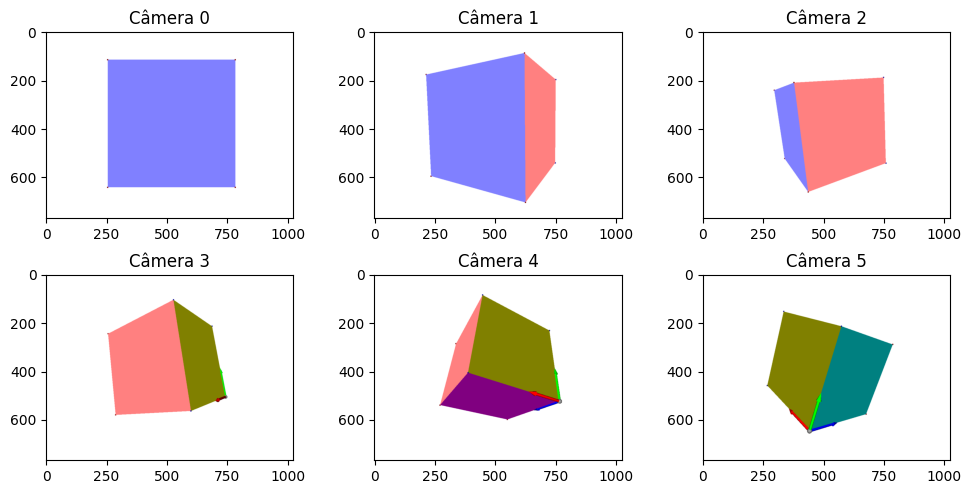

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load the images
img = []
for i in range(1,7):
    img.append(mpimg.imread(f'aux_data/CuboCaptrue{i}.png'))

# Create a figure and a set of subplots
fig, axes = plt.subplots(2, 3, figsize=(10, 5))

# Display images
c = 0
for i in range(0,2): # linha
    for k in range(0,3): # #coluna
        axes[i][k].imshow(img[c])
        axes[i][k].set_title(f'Câmera {c}')
        c+=1

# Adjust layout
plt.tight_layout()
plt.show()

As coordenadas dos pixels correspondentes $\mathbf{u_{nk}}$ para $n=0,...,5$ e $k=0,...,7$

In [3]:
u_nk = np.zeros((6,8,2))
qui_nk = np.zeros((6,8), dtype=int)

# Para a câmera 0: 
P_visados = [0, 1, 2, 3]
qui_nk[0, P_visados] = 1
u_nk[0,0] = [255,144]
u_nk[0,1] = [781,114]
u_nk[0,2] = [781,640]
u_nk[0,3] = [255,640]

# Para a câmera 1:
P_visados = [0, 1, 2, 3, 4, 5]
qui_nk[1, P_visados] = 1
u_nk[1,0] = [215,176]
u_nk[1,1] = [620,86]
u_nk[1,2] = [625,703]
u_nk[1,3] = [235,595]
u_nk[1,4] = [749,196]
u_nk[1,5] = [748,540]

# Para a câmera 2: 
P_visados = [0, 1, 2, 3, 4, 5]
qui_nk[2, P_visados] = 1
u_nk[2,0] = [294,240]
u_nk[2,1] = [375,208]
u_nk[2,2] = [434,660]
u_nk[2,3] = [337,522]
u_nk[2,4] = [745,187]
u_nk[2,5] = [755,541]

# Para a câmera 3: 
P_visados = [1, 2, 4, 5, 6, 7]
qui_nk[3, P_visados] = 1
u_nk[3,1] = [256,246]
u_nk[3,2] = [287,581]
u_nk[3,4] = [526,106]
u_nk[3,5] = [598,565]
u_nk[3,6] = [685,215]
u_nk[3,7] = [743,508]

# Para a câmera 4: 
P_visados = [1, 2, 4, 5, 6, 7, 3]
qui_nk[4, P_visados] = 1
u_nk[4,1] = [338,287]
u_nk[4,2] = [272,541]
u_nk[4,4] = [448,86]
u_nk[4,5] = [388,407]
u_nk[4,6] = [724,233]
u_nk[4,7] = [767,525]
u_nk[4,3] = [550,600]

# Para a câmera 5:
P_visados = [4, 5, 6, 7, 0, 3]
qui_nk[5, P_visados] = 1
u_nk[5,4] = [333,154]
u_nk[5,5] = [265,460]
u_nk[5,6] = [571,215]
u_nk[5,7] = [440,649]
u_nk[5,0] = [783,290]
u_nk[5,3] = [673,578]


qui_nk_expanded = np.repeat(qui_nk, 4, axis=1)
qui_nk_expanded = np.repeat(qui_nk_expanded, 2, axis=0)

print(qui_nk)
k = 7
print(qui_nk_expanded[:,4*(k):4*(k+1)]) # numpy é lin, col...

[[1 1 1 1 0 0 0 0]
 [1 1 1 1 1 1 0 0]
 [1 1 1 1 1 1 0 0]
 [0 1 1 0 1 1 1 1]
 [0 1 1 1 1 1 1 1]
 [1 0 0 1 1 1 1 1]]
[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]]


As respectivas matrizes $T_n$, para $n=0,...,5$ e $K$ são:

In [4]:
import json
import numpy as np

# Load the jsons
cameras = []
for i in range(1,7):
    cameras.append(json.load(open(f"aux_data/CuboCamera{i}.json")))

# Load the Tn
T = []
for i in range(0,6):
    T.append(np.array(cameras[i]['extrinsic'], dtype=float).reshape(4,4).T)
# Load K
K = []
for i in range(0,6):
    K.append(np.array(cameras[i]['intrinsic']['intrinsic_matrix'], dtype=float).reshape(3,3).T)

# show Ts
for i in range(0,6):
    print(f"T{i}:\n", T[i])

# show Ks or K
def all_matrices_are_close(matrix_list, rtol=1e-5, atol=1e-8):
    reference = matrix_list[0]
    return all(np.allclose(reference, m, rtol=rtol, atol=atol) for m in matrix_list[1:])

if all_matrices_are_close(K):
    K = K[0]
    print("K:\n", K)
else:
    for i in range(0,6):
        print(f"K{i}:\n", K[i])

T0:
 [[ 1.          0.          0.         -0.488     ]
 [-0.         -1.         -0.          0.488     ]
 [-0.         -0.         -1.          2.26162003]
 [ 0.          0.          0.          1.        ]]
T1:
 [[ 0.86082046 -0.01883655 -0.50856004 -0.16271085]
 [ 0.02006227 -0.99728187  0.07089696  0.44228545]
 [-0.50851316 -0.07123242 -0.85810274  2.47529001]
 [ 0.          0.          0.          1.        ]]
T2:
 [[ 0.45223409 -0.09387435 -0.88694528  0.25794975]
 [ 0.12825264 -0.97726591  0.16882712  0.33193084]
 [-0.88262993 -0.19010245 -0.42991333  2.82616274]
 [ 0.          0.          0.          1.        ]]
T3:
 [[-0.56821747 -0.14256521 -0.81043449  0.74235398]
 [-0.03496948 -0.97980427  0.19687744  0.3991334 ]
 [-0.82213505  0.14020967  0.55175647  2.15639406]
 [ 0.          0.          0.          1.        ]]
T4:
 [[-0.86847249  0.06410411 -0.49157522  0.63242048]
 [-0.30783174 -0.84699854  0.43339716  0.35205936]
 [-0.38858095  0.52771596  0.75532821  1.65637358]
 [

As matrizes de projeção $P_n$, para $n=0,...,5$ e $K$ são:

In [5]:
# Build Projection matrix P
P = []
for i in range(0,6):
    P.append(K @ T[i][:3,:])
# show Ps
for i in range(0,6):
    print(f"P{i}:\n", P[i])

P0:
 [[ 6.65107510e+02  0.00000000e+00 -5.11500000e+02  8.32246179e+02]
 [ 0.00000000e+00 -6.65107510e+02 -3.83500000e+02  1.19190375e+03]
 [ 0.00000000e+00  0.00000000e+00 -1.00000000e+00  2.26162003e+00]]
P1:
 [[ 3.12433675e+02 -4.89637125e+01 -7.77166651e+02  1.15789063e+03]
 [-1.81671231e+02 -6.90617294e+02 -2.81928301e+02  1.24344109e+03]
 [-5.08513160e-01 -7.12324206e-02 -8.58102738e-01  2.47529001e+00]]
P2:
 [[-1.50680919e+02 -1.59673940e+02 -8.09814635e+02  1.61714655e+03]
 [-2.53186783e+02 -7.22891189e+02 -5.25835753e+01  1.30460311e+03]
 [-8.82629927e-01 -1.90102453e-01 -4.29913327e-01  2.82616274e+00]]
P3:
 [[-7.98447786e+02 -2.31039441e+01 -2.56802631e+02  1.59674077e+03]
 [-3.38547254e+02 -5.97904769e+02  3.42543273e+02  1.09244374e+03]
 [-8.22135051e-01  1.40209673e-01  5.51756474e-01  2.15639406e+00]]
P4:
 [[-7.76386732e+02  3.12562844e+02  5.94000060e+01  1.26786269e+03]
 [-3.53761998e+02 -3.60966017e+02  5.77924073e+02  8.69376594e+02]
 [-3.88580955e-01  5.27715964e-01

Ajustamento de um ponto por vez

In [6]:
results = []
esperado = np.array(points)
for k in range(0,8):
    # Ajustamento do ponto Pk em todas as câmeras
    Ak = []
    for n in range(0,6):
        Pn_1 = P[n][0]
        Pn_2 = P[n][1]
        Pn_3 = P[n][2]
        u, v = u_nk[n,k]
        if len(Ak) == 0:
            Ak = np.array([u * Pn_3 - Pn_1,
                            v * Pn_3 - Pn_2,], dtype=float)
        else: 
            aux = np.array([u * Pn_3 - Pn_1,
                            v * Pn_3 - Pn_2], dtype=float)
            Ak = np.vstack((Ak, aux))

    # print("A.shape", Ak.shape, f" / Esperado (2Nx4) = {2*6 }x{4*1}")

    # Adicionando o relê Qui 
    q = qui_nk_expanded[:,4*(k):4*(k+1)]
    Ak = np.multiply(q, Ak)

    # # Compute eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eig(Ak.T @ Ak)

    # # # Find the index of the minimum eigenvalue
    min_index = np.argmin(eigenvalues)

    # # # Get the minimum eigenvalue and corresponding eigenvector
    min_eigenvalue = eigenvalues[min_index]
    min_eigenvector = eigenvectors[:, min_index]

    # # Remove the imaginary part if exists
    min_eigenvector = np.real(min_eigenvector)

    P_calc_homo = min_eigenvector/min_eigenvector[-1] # Normalizando o vetor
    P_calc_homo = np.round(P_calc_homo, 5)
    P_calc = P_calc_homo[0:3]
    P_esperado = esperado[k]
    print(f"P{k}:", P_calc, "--> Erro:", np.linalg.norm(P_esperado-P_calc))
    results.append(P_calc)

erro = np.linalg.norm(esperado-results)
print("Erro total:", erro)

P0: [-0.0046   0.98765  0.99083] --> Erro: 0.0160552608200552
P1: [0.99977 1.00016 1.00031] --> Erro: 0.00041785164831549776
P2: [9.9997e-01 2.1000e-04 9.9985e-01] --> Erro: 0.0002598076211353191
P3: [6.00000e-04 7.50000e-04 1.00051e+00] --> Erro: 0.0010874741376235163
P4: [ 9.98620e-01  1.00067e+00 -4.00000e-05] --> Erro: 0.0015345683432157929
P5: [ 1.00045e+00 -2.80000e-04 -2.00000e-04] --> Erro: 0.0005664803615307906
P6: [-6.20000e-04  1.00042e+00 -2.00000e-05] --> Erro: 0.0007491328320131705
P7: [-0.00326 -0.00278 -0.00376] --> Erro: 0.005700315780726537
Erro total: 0.017173430059251406


### Exemplo 2 - "Como não fazer"

Utilizando os mesmo dados do exemplo 1, como inserir diversos pontos 3D para serem reconstruídos em um único ajustamento? Bastaria matricializar cada problema separado e juntá-los em uma única matriz, mas lidando com sitema de coordenads homogêneas precisa-se ter cuidado.

### (iii) Relembrando sistema de coordenadas homogêneas

A característica fundamental das coordenadas homogêneas é que elas são definidas a menos de um fator de escala não nulo. Isso significa que um ponto no espaço projetivo pode ser representado por um conjunto infinito de vetores homogêneos proporcionais entre si. 

Por exemplo,$ \begin{bmatrix}x\\ y\\ z\\ w\end{bmatrix}, \begin{bmatrix}2x\\ 2y\\ 2z\\ 2w\end{bmatrix} e \begin{bmatrix}\lambda x\\ \lambda y\\\lambda z\\\lambda w\end{bmatrix} $ (onde $\lambda \neq 0$) representam o mesmo ponto no espaço projetivo.

Digamos que temos $P_k$ pontos 3D que se deseja obter suas coordenadas, para $k=1,...,O$ , adquirem-se suas coordenadas em pixel $\mathbf{u_{nk}}$ em cada imagem $n$.

Tomando as equações de ajustamento para os pontos 3D $X_k$ para $k=1,2$ apenas, empilha-se verticalmente o vetor das incógnitas e horizontalmnte as matrizes dos coeficientes

$
\underbrace{\left[
\begin{matrix} 
    \mathcal{X}_{11} \\
    \mathcal{X}_{11} \\
    \vdots  \\
    \mathcal{X}_{N1} \\
    \mathcal{X}_{N1}
\end{matrix} \ \ 
\begin{matrix} 
    \mathcal{X}_{11} \\
    \mathcal{X}_{11} \\
    \vdots  \\
    \mathcal{X}_{N1} \\
    \mathcal{X}_{N1}
\end{matrix} \ \ 
\begin{matrix} 
    \mathcal{X}_{11} \\
    \mathcal{X}_{11} \\
    \vdots  \\
    \mathcal{X}_{N1} \\
    \mathcal{X}_{N1}
\end{matrix} \ \ 
\begin{matrix} 
    \mathcal{X}_{11} \\
    \mathcal{X}_{11} \\
    \vdots  \\
    \mathcal{X}_{N1} \\
    \mathcal{X}_{N1}
\end{matrix} \ \ 
\begin{matrix} 
    \mathcal{X}_{12} \\
    \mathcal{X}_{11} \\
    \vdots  \\
    \mathcal{X}_{N2} \\
    \mathcal{X}_{N2}
\end{matrix} \ \ 
\begin{matrix} 
    \mathcal{X}_{12} \\
    \mathcal{X}_{12} \\
    \vdots  \\
    \mathcal{X}_{N2} \\
    \mathcal{X}_{N2}
\end{matrix} \ \ 
\begin{matrix} 
    \mathcal{X}_{12} \\
    \mathcal{X}_{12} \\
    \vdots  \\
    \mathcal{X}_{N2} \\
    \mathcal{X}_{N2}
\end{matrix} \ \ 
\begin{matrix} 
    \mathcal{X}_{12} \\
    \mathcal{X}_{12} \\
    \vdots  \\
    \mathcal{X}_{N2} \\
    \mathcal{X}_{N2}
\end{matrix}
\right] }_{2N \times 8}
  \odot
\underbrace{\left[
    \begin{matrix} 
        u_{11}P_1^3 - P_1^1 \\ v_{11}P_1^3 - P_1^2 \\ 
        \vdots \\
        u_{21}P_N^3 - P_N^1 \\ v_{21}P_N^3 - P_N^2 
    \end{matrix} \ \ 
    \begin{matrix} 
        u_{12}P_1^3 - P_1^1 \\ v_{12}P_1^3 - P_1^2 \\ 
        \vdots \\
        u_{22}P_N^3 - P_N^1 \\ v_{22}P_N^3 - P_N^2 
    \end{matrix} 
\right]
}_{2N \times 8}
\begin{bmatrix} X_1 \tilde{w}_1\\ Y_1\tilde{w}_1 \\ Z_1\tilde{w}_1 \\ \tilde{w}_1 \\ X_2\tilde{w}_2 \\ Y_2\tilde{w}_2 \\ Z_2\tilde{w}_2 \\ \tilde{w}_2\end{bmatrix} = 0 
$

E assim sucessivamente, chamando de $A_k$ a matriz dos coeficientes para o problema de ajustamento para o ponto 3D $\mathbf{X_k}$, para $k=1,...,O$ obtemos uma única matriz da forma:

$ \underbrace{\begin{bmatrix} A_1 | A_2 ... | A_O \end{bmatrix}}_{2N \times 4O}
\underbrace{\begin{bmatrix}\mathbf{X_1}\\\mathbf{X_2}\\ \vdots \\\mathbf{X_O}   \end{bmatrix}}_{4O \times 1} = 0 $

<b>Porquê não fazer desta maneira?</b>

$ A\overrightarrow{X}=0 \xrightarrow{ajustamento}$

$A\overrightarrow{X_a}=V$ sujeito a $||\overrightarrow{X_a}||=1 \rightarrow $ Neste ponto, imporíamos a condição da norma unitária no intuito de além de evitar a solução trivial para $\overrightarrow{X_a}$, arbitrar uma escala conveniente para a solução, mas resultando em embaralhamento das escalas entre todos os vetores homogêneos.

Implementação do exemplo 2

In [7]:
A = []
ini = 0 # trocar de onde começar k
fim = 4 # trocar de onde terminar k
for k in range(ini,fim):
    Ak = []
    for n in range(0,6):
        Pn_1 = P[n][0]
        Pn_2 = P[n][1]
        Pn_3 = P[n][2]
        u, v = u_nk[n,k]
        if len(Ak) == 0:
            Ak = np.array([u * Pn_3 - Pn_1,
                           v * Pn_3 - Pn_2,], dtype=float)
        else: 
            aux = np.array([u * Pn_3 - Pn_1,
                            v * Pn_3 - Pn_2], dtype=float)
            Ak = np.vstack((Ak, aux))
    if len(A) == 0:
        A = Ak.copy()
    else:
        A = np.hstack((A, Ak))

# print("A.shape", A.shape, f" / Esperado (2Nx4O) = {2*6 }x{4*8}")

# Adicionando o relê Qui 
q = qui_nk_expanded[:,4*ini:4*(fim)]

A = np.multiply(q, A)
# print(A)
# Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(A.T @ A)

# # Find the index of the minimum eigenvalue
min_index = np.argmin(eigenvalues)

# # Get the minimum eigenvalue and corresponding eigenvector
min_eigenvalue = eigenvalues[min_index]
min_eigenvector = eigenvectors[:, min_index]

# Remove the imaginary part if exists
min_eigenvector = np.real(min_eigenvector)

# print("X_a =",min_eigenvector)
results = []
esperados = []
# Captura dos resultados de 4 em 4
for i in range(0,fim-ini):
    aux = min_eigenvector[i*4:i*4+4]
    P_calc_homo = aux/aux[-1] # Normalizando o vetor
    P_calc_homo = np.round(P_calc_homo, 5)
    P_calc = P_calc_homo[0:3]
    P_esperado = esperado[i+ini]
    print(f"P{i+ini}:", P_calc, "--> Erro:", np.linalg.norm(P_esperado-P_calc))
    results.append(P_calc)
    esperados.append(P_esperado)

results = np.array(results)
esperados = np.array(esperados)

erro = np.linalg.norm(esperados-results)
print("Erro total:", erro)

P0: [ 1.25334  0.39618 -1.30148] --> Erro: 2.689287998411475
P1: [0.58318 0.85793 1.36831] --> Erro: 0.5740862769654052
P2: [ 0.78604 -0.21105  1.18632] --> Erro: 0.35360447748862006
P3: [ 0.07574 -0.01745  0.86612] --> Erro: 0.15480602216968176
Erro total: 2.7768410150384915


## 2. Técnica para remoção de observações com erros grosseiros (outliers) do ajustamento

Existem diversos algoritmos que objetivam remover outliers do ajustametno: 
- Random Sample Consensus (RANSAC) - mais robusto;
- Score baseado em redundância;
- Filtro por erro de reprojeção;
- ...

### Exemplo 3

<b>Filtro por erro de reprojeção</b>

Após a triangulação inicial de um ponto $\mathbf{X_k}$ , reprojete em todas as câmeras $n$:

$\mathbf{u^{predito}_{nk}} = P_n\mathbf{X_k}$

E calcule o erro de reprojeção:

$\epsilon_{nk} = || \mathbf{u^{predito}_{nk}} - \mathbf{u^{utilizado}_{nk}}||$

Considere o ponto $\mathbf{u_{nk}}$ outlier e remova esta observação do ajustamento se $\epsilon_{nk} > \tau$, por exemplo 4 a 5 pixels.

## Prática

#### Problema:

Melhore o erro global das coodenadas dos pontos $P_k$, para $K=0,...7$ se utlizano da técnica de filtro por erro de reprojeção, ou seja, melhor que:


    P0: [-0.0046   0.98765  0.99083] --> Erro: 0.0160552608200552
    P1: [0.99977 1.00016 1.00031] --> Erro: 0.00041785164831549776
    P2: [9.9997e-01 2.1000e-04 9.9985e-01] --> Erro: 0.0002598076211353191
    P3: [6.00000e-04 7.50000e-04 1.00051e+00] --> Erro: 0.0010874741376235163
    P4: [ 9.98620e-01  1.00067e+00 -4.00000e-05] --> Erro: 0.0015345683432157929
    P5: [ 1.00045e+00 -2.80000e-04 -2.00000e-04] --> Erro: 0.0005664803615307906
    P6: [-6.20000e-04  1.00042e+00 -2.00000e-05] --> Erro: 0.0007491328320131705
    P7: [-0.00326 -0.00278 -0.00376] --> Erro: 0.005700315780726537
    Erro total: 0.017173430059251406

In [ ]:
# Imports


# Funções


# Dados


# (i) As coordenadas dos pixels correspondentes $\mathbf{u_{nk}}$ para $n=0,...,5$ e $k=0,...,7$)


# (ii) As respectivas matrizes $T_n$, para $n=0,...,5$ e $K$ são:


# (iii) As matrizes de projeção $P_n$, para $n=0,...,5$ e $K$ são:


# (iv) Ajustamento


# (v) Reprojeção e seleção de outliers


# (vi) Considerar outliers como ponto não visualizados na imagem


# (vii) usar os demais pontos para refazer o ajustamento

